In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df=pd.read_csv('BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
date    324 non-null object
beer    324 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [6]:
df.rename(columns={'date':'ds','beer':'y'},inplace=True)
# prophet library requires in these headers

In [7]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df['ds']=pd.to_datetime(df['ds'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.1 KB


In [10]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [11]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [13]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
len(df)

324

In [15]:
len(future)

348

In [16]:
forecast=m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1773.449803,1144.396228,1471.278494,1773.449803,1773.449803,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,-461.776706,0.0,0.0,0.0,1311.673097
1,1992-02-01,1776.239771,1190.769119,1514.362168,1776.239771,1776.239771,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,-427.591035,0.0,0.0,0.0,1348.648735
2,1992-03-01,1778.849740,1434.686751,1758.369759,1778.849740,1778.849740,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,-179.181320,0.0,0.0,0.0,1599.668420
3,1992-04-01,1781.639707,1426.535291,1737.651049,1781.639707,1781.639707,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,-196.311603,0.0,0.0,0.0,1585.328104
4,1992-05-01,1784.339676,1657.379445,1983.465790,1784.339676,1784.339676,45.026915,45.026915,45.026915,45.026915,45.026915,45.026915,0.0,0.0,0.0,1829.366590


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.010945,5059.461212,5408.012617,5188.400450,5212.177202,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670
344,2020-09-01,5217.085200,4924.246239,5235.881162,5203.324684,5229.459681,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064
345,2020-10-01,5232.640931,5023.643387,5361.278277,5217.762116,5246.545347,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538
346,2020-11-01,5248.715186,5178.271171,5509.765984,5232.858400,5263.620524,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277
347,2020-12-01,5264.270916,6160.537257,6485.028937,5247.473198,5280.193274,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667


In [19]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.788552,4466.265133,4791.090574
337,2020-02-01,4679.048478,4514.031663,4842.520814
338,2020-03-01,4942.495400,4784.337705,5090.232475
339,2020-04-01,4941.439371,4780.201547,5103.312822
340,2020-05-01,5198.333619,5034.220052,5360.811388
341,2020-06-01,5179.412285,5009.464530,5339.131466
342,2020-07-01,5311.959526,5148.705779,5476.346652
343,2020-08-01,5241.229670,5059.461212,5408.012617
344,2020-09-01,5084.201064,4924.246239,5235.881162
345,2020-10-01,5189.365538,5023.643387,5361.278277


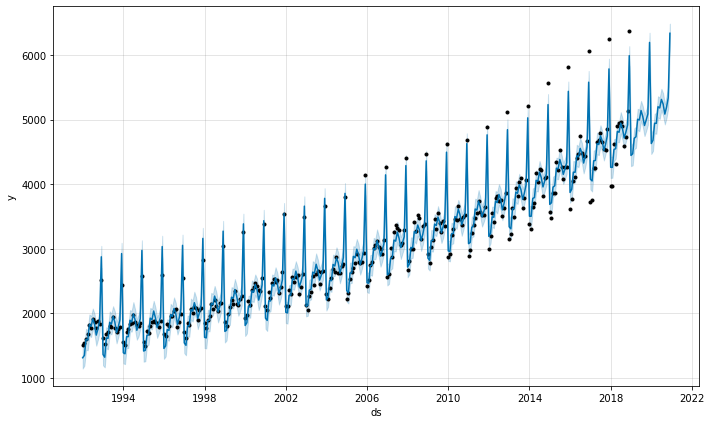

In [21]:
m.plot(forecast);

In [23]:
# Plotly visualization
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

4.5.0


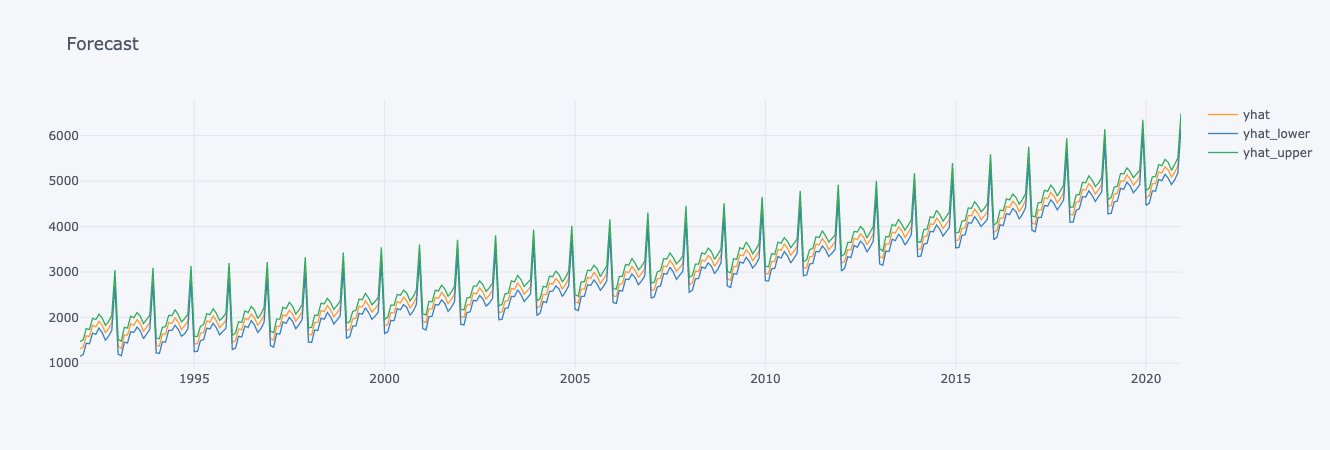

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iplot(kind='line',x='ds',title='Forecast',)

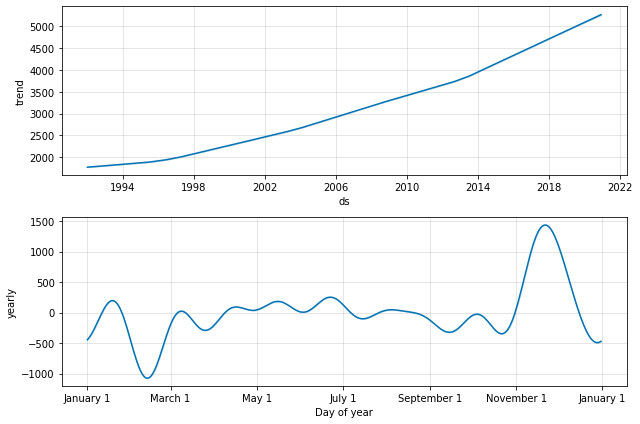

In [103]:
m.plot_components(forecast);


In [ ]:
forecast['Actual/Forecast']='Actual' if forecast['ds']<='2018-12-01' e

In [31]:
forecast['Actual/Forecast']=forecast['ds'].apply(lambda x: 'Actual' if x<=pd.Timestamp('2018-12-01') else 'Forecast')

In [33]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Actual/Forecast
343,2020-08-01,5201.010945,5059.461212,5408.012617,5188.400450,5212.177202,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670,Forecast
344,2020-09-01,5217.085200,4924.246239,5235.881162,5203.324684,5229.459681,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064,Forecast
345,2020-10-01,5232.640931,5023.643387,5361.278277,5217.762116,5246.545347,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538,Forecast
346,2020-11-01,5248.715186,5178.271171,5509.765984,5232.858400,5263.620524,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277,Forecast
347,2020-12-01,5264.270916,6160.537257,6485.028937,5247.473198,5280.193274,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667,Forecast


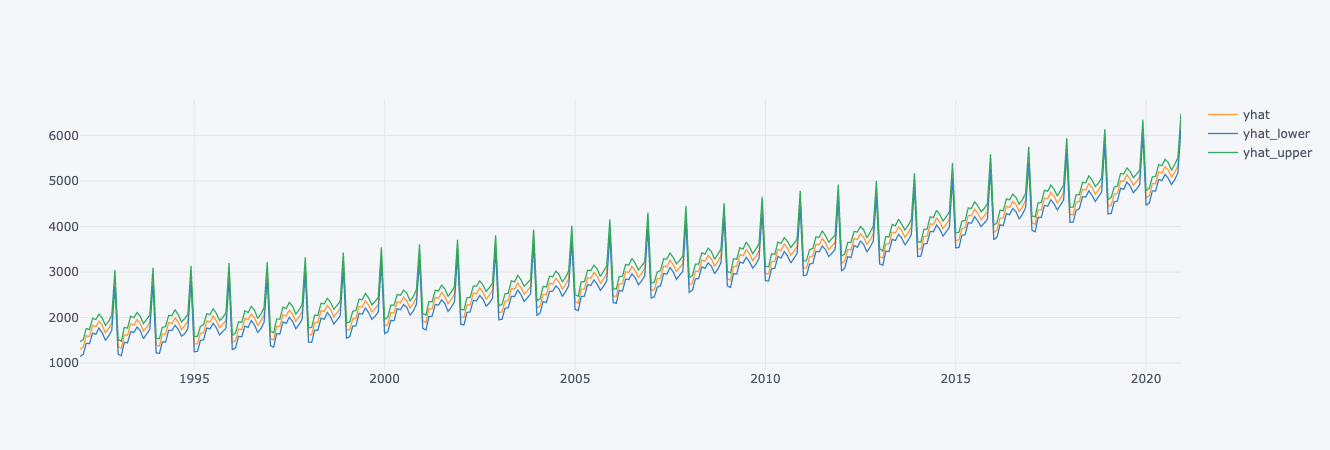

In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iplot(kind='line',x='ds')

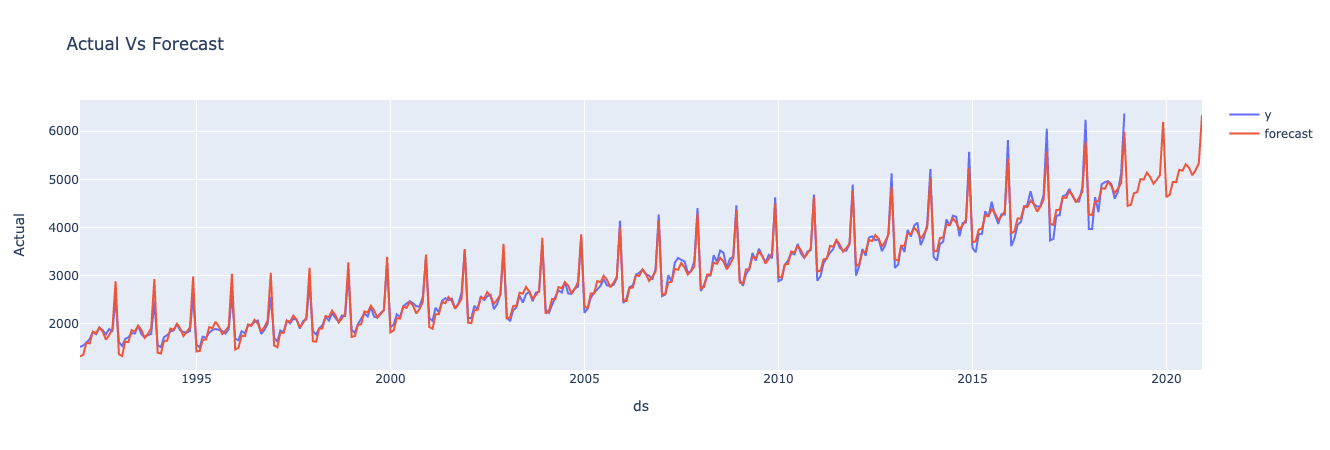

In [49]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(df, x='ds', y='y', title="Actual Vs Forecast",labels={'y':'Actual'})
fig.update_traces(name='y', showlegend = True)
fig.add_scatter(x=forecast['ds'], y=forecast['yhat'], name='forecast')